# Regression

## Polynomial fit

In [1]:
import numpy as np
from numpy import typing


# Define function for n-power
def power(x: typing.ArrayLike, order: int) -> float:
    """
    Return x^(order).
    """
    return x**order


def poly_fit(data: np.ndarray, order: int) -> np.ndarray:
    """
    Returns the polynomial fitting coefficients of order "order"
    for the input data.
    """
    num_terms = order + 1  # Save total number of terms in the polynomial
    x_data = data[:, 0]
    y_data = data[:, 1]
    coeff_mat = np.zeros((num_terms, num_terms))
    const_vect = np.zeros((num_terms, 1))

    # Fill in coeff_mat
    for i in range(num_terms):
        for j in range(num_terms):
            coeff_mat[i, j] = np.sum(power(x_data, i) * power(x_data, j))
    # Fill in const_vect
    for i in range(num_terms):
        const_vect[i] = np.sum(y_data * power(x_data, i))

    # ================================================================
    # Can edit this part to apply different system of linear equations
    # solving methods.
    # ================================================================
    fitting_coeff = np.matmul(np.linalg.inv(coeff_mat), const_vect)

    return fitting_coeff

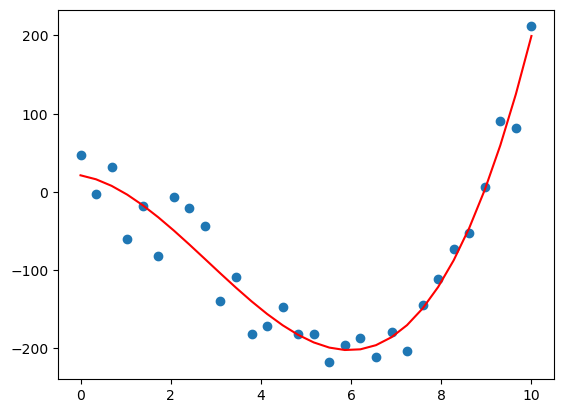

In [3]:
# Example for poly_fit
import matplotlib.pyplot as plt

data = np.genfromtxt("./data/ch3_data_poly.txt")
coeff = poly_fit(data, 3)


def polynomial(x):
    result = coeff[0] + coeff[1] * x + coeff[2] * x**2 + coeff[3] * x**3
    return result


fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], polynomial(data[:, 0]), "r-")